In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Setting seed for entire notebook
SEED = 42
np.random.seed(SEED)


In [31]:
cars = pd.read_csv('dataset/toyota.csv')
cars.head()
cars.dtypes

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

## Exploring the data
We have 6738 rows of data spread across 9 columns.

There are no missing values in the dataset, further exploration should give us more information.

In [32]:
cars.shape
cars.info()

(6738, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [33]:
cars.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

Looking at the spread of unique values in the columns of the dataset, it appears some columns might be ideal candidates for categorical datatype conversion.
These columns are: `model, transmission,fuelType, engineSize, tax, mpg`

In [34]:
#creating a copy of the uncleaned data. This gives a version of the data to perform cleaning tasks on.
cars_cleaned = cars.copy()

In [35]:
cars['model'].isna().sum()
cars['model'].describe()

0

count       6738
unique        18
top        Yaris
freq        2122
Name: model, dtype: object

### Column: model
- Has no missing values.
- A total of 6738 entries with 18 unique values.
- Most recurring entry is `Yaris` with 2122 out of 6738 entries.
- Ideal candidate for a Pandas Category dtype

In [36]:
cars['year'].describe()
cars['year'].unique()


count    6738.000000
mean     2016.748145
std         2.204062
min      1998.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2020.000000
Name: year, dtype: float64

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998], dtype=int64)

### Column: year
- Has no missing values
- The most common year for a used car is 2017 even though the oldest and newest cars in the lot are 1998 and 2020, respectively as expected.
- Most of the cars are between the years 2016 - 2018 as can be seen in the chart below. `each bin = 1year`

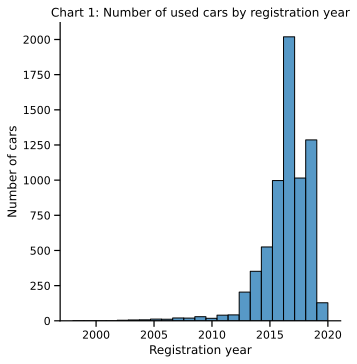

In [37]:
chart_num = 1
years_ax = sns.displot(cars['year'],bins=23)
years_ax.set(title=f'Chart {chart_num}: Number of used cars by registration year', xlabel='Registration year', ylabel='Number of cars')

### Column: price
- Has no missing values
- Average price for a car is GBP12522 but the median price is GBP10795. This difference might indicate the presence of relatively higher priced cars.
- A visualization exploring the relationship between this column and other columns within the dataset is recommended.


In [38]:
cars['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

### Column: transmission
- Has no missing values.
- Has 4 unique entries as expected (Manual, Automatic, Semi-auto, Other). Ideal candidate for Pandas Categorical dtype.
- Most recurring transmissing is `Manual` with 3826 entries.

In [39]:
cars['transmission'].describe()

count       6738
unique         4
top       Manual
freq        3826
Name: transmission, dtype: object

### Column: mileage
- Has no missing values
- Average mileage is 22857.42 with a median mileage of 18513


In [40]:
cars['mileage'].describe()
cars['mileage'].info()

count      6738.000000
mean      22857.413921
std       19125.464147
min           2.000000
25%        9446.000000
50%       18513.000000
75%       31063.750000
max      174419.000000
Name: mileage, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 6738 entries, 0 to 6737
Series name: mileage
Non-Null Count  Dtype
--------------  -----
6738 non-null   int64
dtypes: int64(1)
memory usage: 52.8 KB


### Column: fuelType
- Has no missing values
- Having only 4 unique entries in the dataset makes it an ideal candidate for Pandas' Cat type
- Most common fuel type used by the cars is `Petrol` with 4087 entries

In [41]:
cars['fuelType'].describe()

count       6738
unique         4
top       Petrol
freq        4087
Name: fuelType, dtype: object

### Column: tax
- Has no missing values
- Average tax for all cars is GBP94.70 although the median tax is GBP135.00. This is most likely due the fact that 25% of cars in the lot have no tax on them.
- Has 29 unique entries

In [42]:
cars['tax'].describe()
cars['tax'].nunique()

count    6738.000000
mean       94.697240
std        73.880776
min         0.000000
25%         0.000000
50%       135.000000
75%       145.000000
max       565.000000
Name: tax, dtype: float64

29

### Column: mpg
- Has no missing values
- Mean and median values are closely matched with 63.04mpg and 62.80mpg respectively
- There are 81 unique entries in the column.

In [43]:
cars['mpg'].describe()
cars['mpg'].nunique()

count    6738.000000
mean       63.042223
std        15.836710
min         2.800000
25%        55.400000
50%        62.800000
75%        69.000000
max       235.000000
Name: mpg, dtype: float64

81

### Column: engineSize
- Has no missing values
- 16 unique entries in the column. Idea candidate for Pandas' Cat dtype
- The most common engine size in the lot is `1.0`

In [44]:
cars['engineSize'].describe()
cars['engineSize'].nunique()
cars['engineSize'].mode()

count    6738.000000
mean        1.471297
std         0.436159
min         0.000000
25%         1.000000
50%         1.500000
75%         1.800000
max         4.500000
Name: engineSize, dtype: float64

16

0    1.0
Name: engineSize, dtype: float64

### Columns: Summary
#### In summary:
- There were no missing values in the entire dataset.
- Some columns have repeating values that make them ideal for categorical data.
- Relationships between columns require further exploration and assessment.

In [45]:
engine_size_cat = np.sort(cars_cleaned['engineSize'].unique())
engine_size_cat

cars_cleaned['model'] = cars_cleaned['model'].astype('category')
cars_cleaned['transmission'] = cars_cleaned['transmission'].astype('category')
cars_cleaned['fuelType'] = cars_cleaned['fuelType'].astype('category')
cars_cleaned['engineSize'] = cars_cleaned['engineSize'].astype('category').cat.set_categories(engine_size_cat, ordered=True)

array([0. , 1. , 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2. , 2.2, 2.4, 2.5, 2.8,
       3. , 4.2, 4.5])

We have now changed the datatypes of four columns (model, transmission, fuelType, engineSize) to a Pandas Categorical datatype

This has reduced the memory consumption of our dataset by `181kb`, corresponding to a `38%` reduction in memory usage

In [46]:
cars_cleaned.dtypes
cars_cleaned.info()


model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize      category
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6738 non-null   category
 1   year          6738 non-null   int64   
 2   price         6738 non-null   int64   
 3   transmission  6738 non-null   category
 4   mileage       6738 non-null   int64   
 5   fuelType      6738 non-null   category
 6   tax           6738 non-null   int64   
 7   mpg           6738 non-null   float64 
 8   engineSize    6738 non-null   category
dtypes: category(4), float64(1), int64(4)
memory usage: 291.4 KB


## Vehicles in the lot

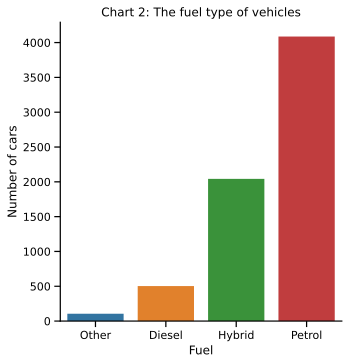

In [47]:
chart_num+=1
fuel_order = ['Other','Diesel','Hybrid','Petrol']
(sns.catplot(data=cars_cleaned,x='fuelType', kind='count', order=fuel_order)
 .set(title=f'Chart {chart_num}: The fuel type of vehicles', xlabel= 'Fuel', ylabel='Number of cars'))

Chart 2 shows that the most common used cars sold are petrol fuel cars, with Hybrid cars in a distant second and Diesel and `other` fuel vehicles making up a tiny minority.

This could be an indication of customer preference. Further exploration might reveal some of the reasons for this preference.

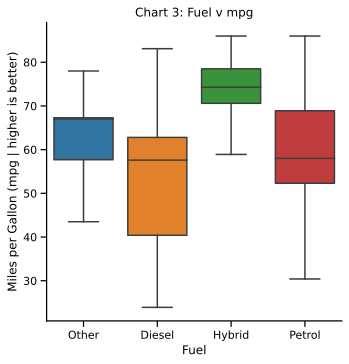

In [48]:
chart_num+=1
(sns.catplot(data=cars_cleaned,x='fuelType', y='mpg',order=fuel_order,kind='box',sym='')
 .set(title=f'Chart {chart_num}: Fuel v mpg',xlabel= 'Fuel',ylabel='Miles per Gallon (mpg | higher is better)' ))

### Fuel and Miles per Gallon
From the boxplot of chart 3, Hybrid vehicles provide the most efficiency with a median mpg of 75. Diesel and Petrol cars have closely matched median values even though most of the diesel vehicles have lower mpg.

It however cannot simply be concluded that one fuel type provides better range than the other as the vehicles in the dataset all have varying registration years and **mpg** is far too limited a metric to draw conclusions on. It will be advisable to get more data before any further conclusions can be drawn.

## Correlation

[Text(0.5, 1.0, 'Chart 4: Correlation Heatmap of the dataset')]

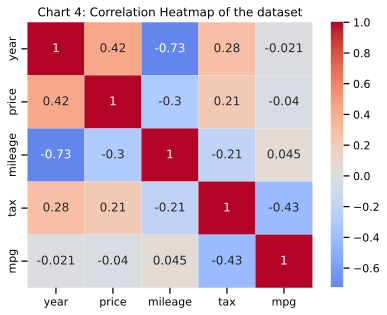

In [49]:
chart_num +=1
corr_ax = sns.heatmap(cars_cleaned.corr(numeric_only=True), cmap='coolwarm',  center=0.0,annot=True)
corr_ax.set(title=f'Chart {chart_num}: Correlation Heatmap of the dataset')

Looking at the correlation heatmap, we can observe the following:
- Most of the columns have little to no correlation between them.
- However, looking at the price column, we can see a moderate positive correlation between the registration year and price as well as a moderately low negative correlation between the price and mileage. This relationship might indicate lower mileage cars with more recent registration years are likely to have higher price tags than other vehicles. Although, further investigation will be necessary before any such conclusion can be drawn.

In [50]:
chart_num+=1
rel_ax = sns.relplot(data=cars_cleaned, x='year',y='price', s=15,size='mileage',hue='mileage',palette='dark:salmon')
rel_ax.map(sns.lineplot,data=cars_cleaned,x='year',y='price', errorbar=None)
rel_ax.set(title=f'Chart {chart_num}: Registration year of cars and their price', xlabel='Registration year',ylabel='Price (GBP)')


In Chart 5 above, the relationship between the registration year and the price is visualized. Most of the recently registered cars, especially with a low mileage, have a higher price tag. Although, there are a few outliers going against the norm, they do not takeaway from the stated trend.

In [51]:
# File save for model fitting
cars_cleaned.to_pickle('dataset/cars_cleaned.pkl')